### 2

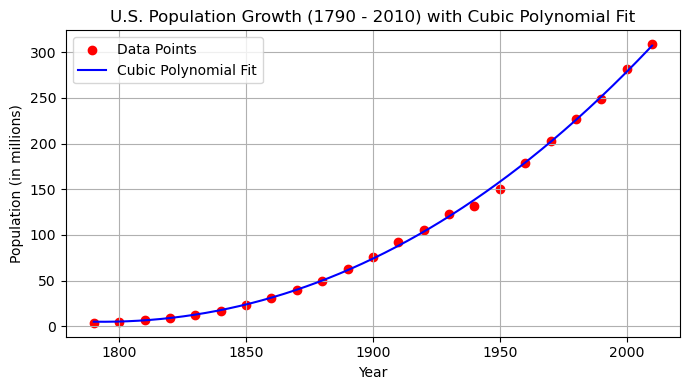

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data from the census (years from 1790 to 2010 with population in millions)
years = np.linspace(1790, 2010, 23)

population = np.array(
    [3.929, 5.308, 7.240, 9.638, 12.87, 17.07, 23.19, 31.44, 
     39.82, 50.19, 62.95, 76.21, 92.22, 106.0, 122.8, 132.2, 
     150.7, 179.3, 203.3, 226.5, 248.7, 281.4, 308.7]
)

# (a) Fit a cubic polynomial to the data
A = np.stack([np.ones_like(years), years, years**2, years**3], axis=1)
coeff = np.linalg.lstsq(A, population, rcond=None)[0]  # Fit a cubic polynomial (degree=3)

# Generate smooth values for plotting the cubic fit
def cubic_polynomial(x, coeff):
    c_1, c_2, c_3, c_4 = coeff
    return c_1 + c_2 * x + c_3 * x**2 + c_4 * x**3
years_smooth = np.linspace(1790, 2010, 500)
population_smooth = cubic_polynomial(years_smooth, coeff)

# Plot the data points and the cubic polynomial curve
plt.figure(figsize=(7, 4))
plt.scatter(years, population, color='red', label='Data Points')  # Actual census data
plt.plot(years_smooth, population_smooth, label='Cubic Polynomial Fit', color='blue')
plt.xlabel('Year')
plt.ylabel('Population (in millions)')
plt.title('U.S. Population Growth (1790 - 2010) with Cubic Polynomial Fit')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [2]:
# (b) Predict population for 2000, 2010, and 2020
pred_2000 = cubic_polynomial(2000, coeff)
pred_2010 = cubic_polynomial(2010, coeff)
pred_2020 = cubic_polynomial(2020, coeff)

# Actual population in 2000, 2010, and 2020 (given or from other source)
actual_2000 = 281.4
actual_2010 = 308.7
# Population for 2020 isn't in the data, we'll compare to predicted value

# Print predictions and compare with actual values
print(f"Predicted population in 2000: {pred_2000:.2f} million (Actual: {actual_2000} million)")
print(f"Predicted population in 2010: {pred_2010:.2f} million (Actual: {actual_2010} million)")
print(f"Predicted population in 2020: {pred_2020:.2f} million")


Predicted population in 2000: 278.55 million (Actual: 281.4 million)
Predicted population in 2010: 307.18 million (Actual: 308.7 million)
Predicted population in 2020: 337.38 million


### 3

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Weekly box office earnings in dollars
weeks = np.linspace(1, 18, 18)
earnings = np.array(
    [189932838, 79406327, 463030374, 263830921, 18804290, 13822248, 
     7474688, 6129424, 4377675, 3764963, 2426574, 1713298, 
     1426102, 1031985, 694947, 518242, 460578, 317909]
)

# Define the exponential model y(t) = ae^(bt)
# Convert to log scale, log(y(t)) = log(a) + bt, written as z(t) = c_1 + c_2 t
# After fitting, a = exp(c_1), b = c_2
z = np.log(earnings)
A = np.stack([np.ones_like(weeks), weeks], axis=1)
c = np.linalg.lstsq(A, z, rcond=None)[0]

a_fit = np.exp(c[0])
b_fit = c[1]

earnings_fit = a_fit * np.exp(b_fit * weeks)

# Print the fitted parameters
print(f"Fitted Parameters: a = {a_fit:.2e}, b = {b_fit:.2e}")


Fitted Parameters: a = 2.82e+08, b = -4.04e-01


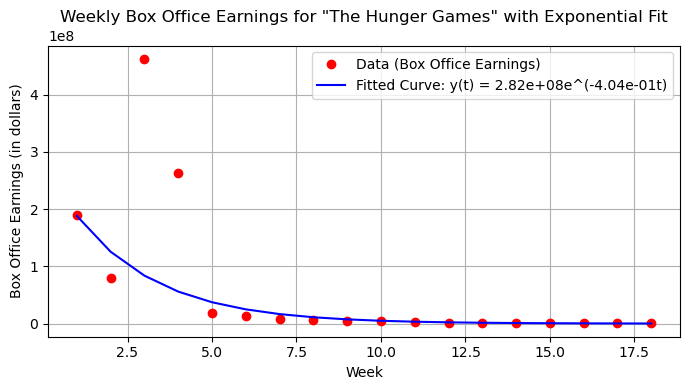

In [4]:
# Plot the data with the fitted curve using linear scales
plt.figure(figsize=(7, 4))
plt.plot(weeks, earnings, 'ro', label='Data (Box Office Earnings)')
plt.plot(weeks, earnings_fit, 'b-', label=f'Fitted Curve: y(t) = {a_fit:.2e}e^({b_fit:.2e}t)')
plt.xlabel('Week')
plt.ylabel('Box Office Earnings (in dollars)')
plt.title('Weekly Box Office Earnings for "The Hunger Games" with Exponential Fit')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

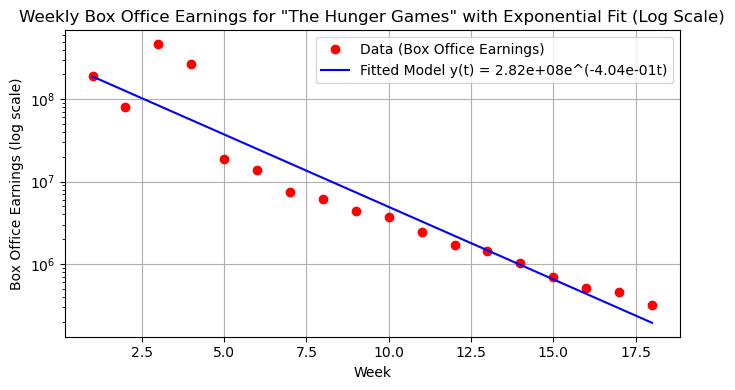

In [5]:
# Plot the data again with a log scale on the vertical axis
plt.figure(figsize=(7, 4))
plt.plot(weeks, earnings, 'ro', label='Data (Box Office Earnings)')
plt.plot(weeks, earnings_fit, 'b-', label=f'Fitted Model y(t) = {a_fit:.2e}e^({b_fit:.2e}t)')
plt.yscale('log')  # Set the y-axis to logarithmic scale
plt.xlabel('Week')
plt.ylabel('Box Office Earnings (log scale)')
plt.title('Weekly Box Office Earnings for "The Hunger Games" with Exponential Fit (Log Scale)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### 4

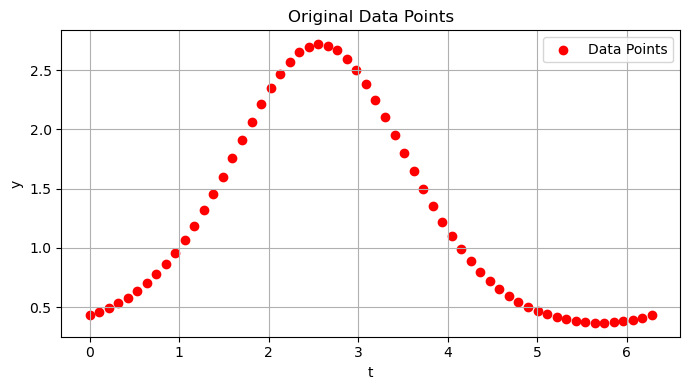

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the periodic function g(t) = e^(sin(t-1))
def g(t):
    return np.exp(np.sin(t - 1))

# Generate 60 data points
t = np.linspace(0, 2 * np.pi, 60)  # 60 data points over one period
y = g(t)

# Plot the original data points
plt.figure(figsize=(7, 4))
plt.scatter(t, y, color='red', label='Data Points')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Original Data Points')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Polynomial coefficients (Degree 6):
 [ 0.5551891  -0.76151032  1.53062765 -0.17393792 -0.16828426  0.04530108
 -0.00315507]


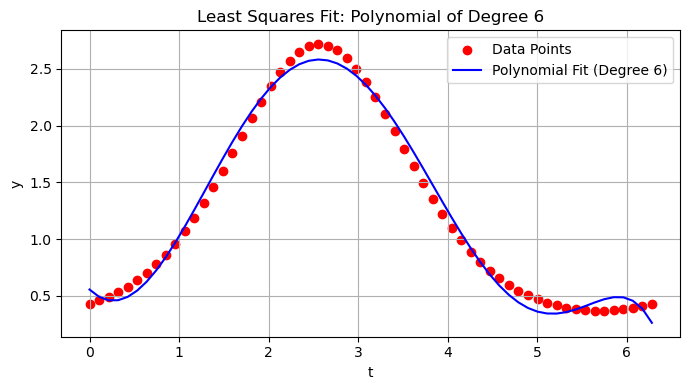

In [7]:
# (a): Polynomial fit of degree 6
# Create the matrix for polynomial fitting (using t, t^2, ..., t^6)
A = np.stack([t**i for i in range(7)], axis=1)
c = np.linalg.lstsq(A, y, rcond=None)[0]

# Define the polynomial model
def poly_model(t, coeff):
    return sum(c * t**i for i, c in enumerate(coeff))

# Generate fitted curve for the polynomial
y_fit_poly = poly_model(t, c)

print("Polynomial coefficients (Degree 6):\n", c)

# Plot the data and polynomial fit
plt.figure(figsize=(7, 4))
plt.scatter(t, y, color='red', label='Data Points')
plt.plot(t, y_fit_poly, label=f'Polynomial Fit (Degree 6)', color='blue')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Least Squares Fit: Polynomial of Degree 6')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Fourier coefficients:
 [ 1.26611522 -0.95103128  0.61071353  0.11308062 -0.24687001]


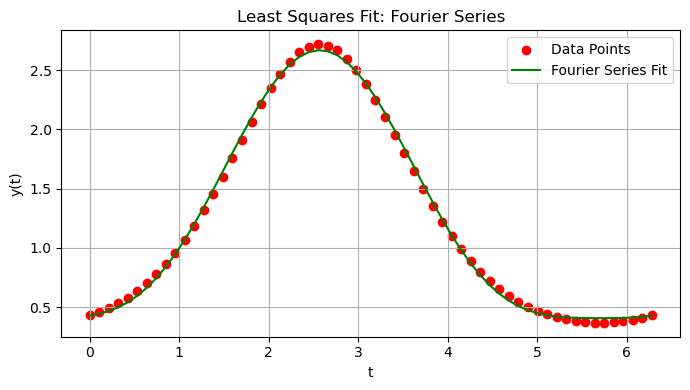

In [8]:
# (b): Fourier series fit (using cos and sin terms)
# Create a matrix for the Fourier series fitting
A = np.stack(
    [np.ones_like(t), np.cos(t), np.sin(t), np.cos(2*t), np.sin(2*t)], axis=-1
)
d = np.linalg.lstsq(A, y, rcond=None)[0]

# Define the Fourier series model
def fourier_model(t, coeff):
    d1, d2, d3, d4, d5 = coeff
    return d1 + d2 * np.cos(t) + d3 * np.sin(t) + d4 * np.cos(2 * t) + d5 * np.sin(2 * t)

# Generate fitted curve for the Fourier model
y_fit_fourier = fourier_model(t, d)

print("Fourier coefficients:\n", d)

# Plot the data and Fourier series fit
plt.figure(figsize=(7, 4))
plt.scatter(t, y, color='red', label='Data Points')
plt.plot(t, y_fit_fourier, label=f'Fourier Series Fit', color='green')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Least Squares Fit: Fourier Series')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


### 5

Cubic Polynomial coefficients:
 [ 0.19287768  0.51076038 -0.09251524  0.00503596]


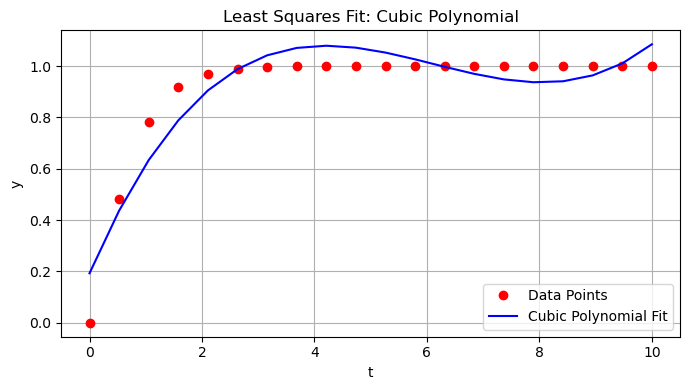

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data
t = np.linspace(0, 10, 20)  # t from 0 to 10 with step 0.5
y = np.tanh(t)  # y = tanh(t)

# (a): Fit the data to a cubic polynomial
A = np.stack([t**i for i in range(4)], axis=1)
# Perform the least-squares fit for the cubic polynomial
c = np.linalg.lstsq(A, y, rcond=None)[0]

# Generate the fitted values for the cubic polynomial
y_fit_poly = A @ c

print("Cubic Polynomial coefficients:\n", c)

# Plot the data and the cubic polynomial fit
plt.figure(figsize=(7, 4))
plt.plot(t, y, 'ro', label='Data Points')
plt.plot(t, y_fit_poly, label='Cubic Polynomial Fit', color='blue')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Least Squares Fit: Cubic Polynomial')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Transformed Cubic coefficients:
 [ 0.0088276   2.52883322 -2.29736128  0.76727426]


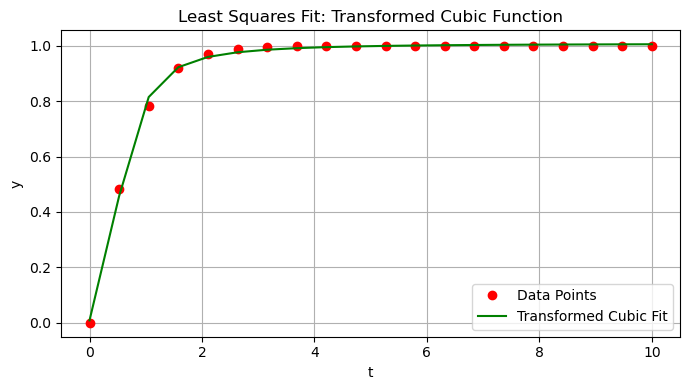

In [10]:
# (b): Define the transformation z = t^2 / (1 + t^2)
z = t**2 / (1 + t**2)

# Fit the data to the function c1 + c2z + c3z^2 + c4z^3
A = np.stack([z**i for i in range(4)], axis=1)
# Perform the least-squares fit for the transformed cubic model
c = np.linalg.lstsq(A, y, rcond=None)[0]

# Generate the fitted values for the transformed cubic model
y_fit_z = A @ c

print("Transformed Cubic coefficients:\n", c)

# Plot the data and the transformed cubic fit
plt.figure(figsize=(7, 4))
plt.plot(t, y, 'ro', label='Data Points')
plt.plot(t, y_fit_z, label='Transformed Cubic Fit', color='green')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Least Squares Fit: Transformed Cubic Function')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


### 6

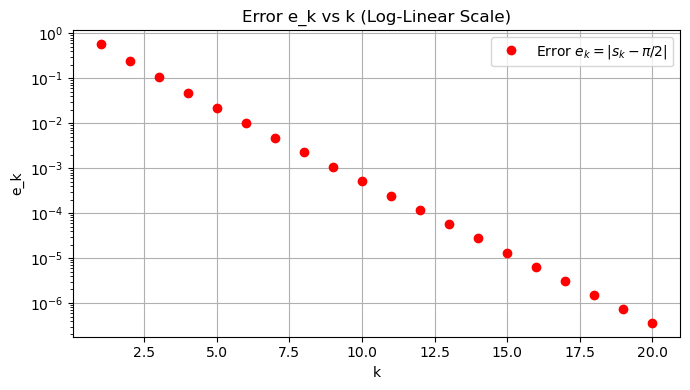

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Given the series for pi/2
def calculate_sk(k):
    term = 1
    s_k = 1
    for n in range(1, k):
        term *= (n) / (2 * n + 1)
        s_k += term
    return s_k

# Exact value of pi/2
pi_over_2 = np.pi / 2

# (a): Calculate e_k for k = 1, ..., 20
k_values = np.linspace(1, 20, 20).astype(int)
s_k_values = np.array([calculate_sk(k) for k in k_values])
e_k_values = np.abs(s_k_values - pi_over_2)

# Plot the sequence on a log-linear scale
plt.figure(figsize=(7, 4))
plt.plot(k_values, e_k_values, 'ro', label=r'Error $e_k = |s_k - \pi/2|$')
plt.yscale('log')  # Log scale for the y-axis
plt.xlabel('k')
plt.ylabel('e_k')
plt.title('Error e_k vs k (Log-Linear Scale)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



Fitted parameters: a = 9.37e-01, b = 0.48


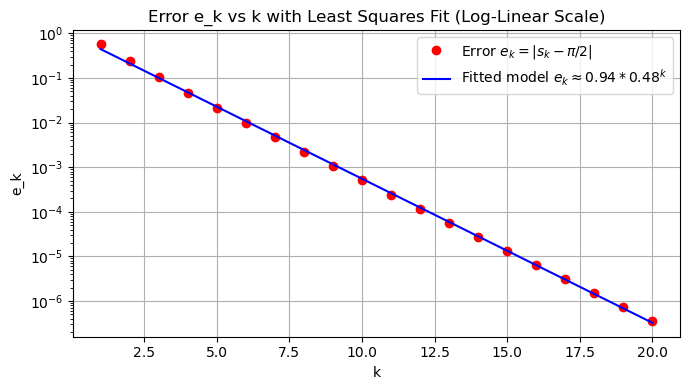

In [12]:
# (b): Fit the data to e_k = a * b^k
# Convert to log scale, log(e_k) = log(a) + log(b) * k, written as z = c_1 + c_2 * k
# After fitting, a = exp(c_1), b = exp(c_2)
z = np.log(e_k_values)
A = np.stack([np.ones_like(k_values), k_values], axis=1)
c = np.linalg.lstsq(A, z, rcond=None)[0]

a_fit = np.exp(c[0])
b_fit = np.exp(c[1])

e_k_fit = a_fit * b_fit**k_values

print(f"Fitted parameters: a = {a_fit:.2e}, b = {b_fit:.2f}")

# Plot the original data and the fitted curve
plt.figure(figsize=(7, 4))
plt.plot(k_values, e_k_values, 'ro', label=r'Error $e_k = |s_k - \pi/2|$')
plt.plot(k_values, e_k_fit, 'b-', label=r'Fitted model $e_k \approx'+f'{a_fit:.2f}*{b_fit:.2f}'+r'^k$')
plt.yscale('log')  # Log scale for the y-axis
plt.xlabel('k')
plt.ylabel('e_k')
plt.title('Error e_k vs k with Least Squares Fit (Log-Linear Scale)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


### 7

Fitted parameters: alpha = 1.50, c = 2.02e-01


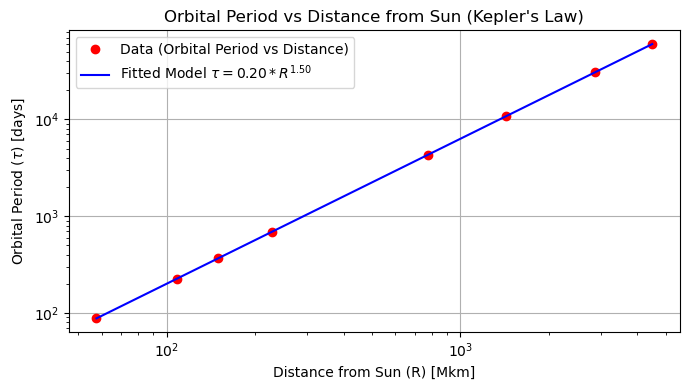

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Planet data: distance from sun (R) in Mkm and orbital period (tau) in days
R = np.array([57.59, 108.11, 149.57, 227.84, 778.14, 1427, 2870.3, 4499.9])
tau = np.array([87.99, 224.7, 365.26, 686.98, 4332.4, 10759, 30684, 60188])

ln_tau = np.log(tau)
ln_R = np.log(R)

A = np.stack([np.ones_like(ln_R), ln_R], axis=1)

coeff = np.linalg.lstsq(A, ln_tau, rcond=None)[0]

c = np.exp(coeff[0])
alpha = coeff[1]

tau_fit = c * R**alpha

print(f"Fitted parameters: alpha = {alpha:.2f}, c = {c:.2e}")

plt.figure(figsize=(7, 4))
plt.plot(R, tau, 'ro', label='Data (Orbital Period vs Distance)')
plt.plot(R, tau_fit, 'b-', label=r'Fitted Model $\tau = '+f'{c:.2f}*R'+r'^{'+f'{alpha:.2f}'+r'}$')
plt.xscale('log')  # Log scale for x-axis
plt.yscale('log')  # Log scale for y-axis
plt.xlabel('Distance from Sun (R) [Mkm]')
plt.ylabel(r'Orbital Period ($\tau$) [days]')
plt.title("Orbital Period vs Distance from Sun (Kepler's Law)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
